# Understanding the local electricity market

## 📖 Background
You work for an energy company in Australia. Your company builds solar panel arrays and then sells the energy they produce to industrial customers. The company wants to expand to the city of Melbourne in the state of Victoria. 

Prices and demand for electricity change every day. Customers pay for the energy received using a formula based on the local energy market's daily price.

Your company's pricing committee wants your team to estimate energy prices for the next 12-18 months to use those prices as the basis for contract negotiations.

In addition, the VP of strategy is researching investing in storage capacity (i.e., batteries) as a new source of revenue. The plan is to store some of the energy produced by the solar panels when pricing conditions are unfavorable and sell it by the next day on the open market if the prices are higher.

## 💾 The data
You have access to over five years of energy price and demand data ([source](https://www.kaggle.com/aramacus/electricity-demand-in-victoria-australia)):

- "date" - from January 1, 2015, to October 6, 2020.
- "demand" - daily electricity demand in MWh.
- "price" - recommended retail price in AUD/MWh.  #ราคากลาง กำหนดให้ขายได้เท่านี้
- "demand_pos_price" - total daily demand at a positive price in MWh.
- "price_positive" - average positive price, weighted by the corresponding intraday demand in AUD/MWh. #ค่าไฟขึ้น demand น้อยลง
- "demand_neg_price" - total daily demand at a negative price in MWh.
- "price_negative" - average negative price, weighted by the corresponding intraday demand in AUD/MWh.  #คนซื้อเยอะ
- "frac_neg_price" - the fraction of the day when the demand traded at a negative price.

EFFECT SOLAR GENERATION
- "min_temperature" - minimum temperature during the day in Celsius.
- "max_temperature" - maximum temperature during the day in Celsius.
- "solar_exposure" - total daily sunlight energy in MJ/m^2. #MegaJ /m2/24hr -> เปลี่ยนหน่วยให้เป็น MWh/hr
- "rainfall" - daily rainfall in mm.
- "school_day" - "Y" if that day was a school day, "N" otherwise. -> ช่วง on peak ค่าไฟแพงขึ้น
- "holiday" - "Y" if the day was a state or national holiday, "N" otherwise. -> ช่วง off peak ค่าไฟถูกลง 

Note: The price was negative during some intraday intervals, so energy producers were paying buyers rather than vice-versa.

Energy generated/day -> Generate ไฟ 'solar exposure' x 70MWh

Predict ค่า energy output จากปัจจัยที่มีผล

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'/Users/pawinee/Documents/Health Tech Dev/3.Basic Programming/GitHub/Basic-programming/complete_dataset.csv')
df.columns = df.columns.str.replace('RRP', 'price')
df.head()


,date,demand,price,demand_pos_price,price_positive,demand_neg_price,price_negative,frac_at_neg_price,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


## 💪 Competition challenge

Create a report that covers the following:

1. How do energy prices change throughout the year? Are there any patterns by season or month of the year?
2. Build a forecast of daily energy prices the company can use as the basis of its financial planning.
3. Provide guidance on how much revenue the energy storage venture could generate per year using retail prices and a 70MWh storage system.

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

## EDA (inspection, data profiling, visualizations)

Expand data information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2106 non-null   object 
 1   demand             2106 non-null   float64
 2   price              2106 non-null   float64
 3   demand_pos_price   2106 non-null   float64
 4   price_positive     2106 non-null   float64
 5   demand_neg_price   2106 non-null   float64
 6   price_negative     2106 non-null   float64
 7   frac_at_neg_price  2106 non-null   float64
 8   min_temperature    2106 non-null   float64
 9   max_temperature    2106 non-null   float64
 10  solar_exposure     2105 non-null   float64
 11  rainfall           2103 non-null   float64
 12  school_day         2106 non-null   object 
 13  holiday            2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


## Printed data information 
Found datetime64 at ['date']\
Found missing data at ['solar_exposure','rainfall']

## Prepare data
1. convert date column to datetime
2. fill missing values 
	- 'rainfall' -> Rain = number, no rain = '0' -> if no data -> imply no rain = '0' 
    - 'solar_exposure' -> some value -> if no data -> interpolate (ประมาณค่ากลาง)

In [7]:
# 1. convert the date column to type DATETIME
df.date = pd.to_datetime(df.date)  
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               2106 non-null   datetime64[ns]
 1   demand             2106 non-null   float64       
 2   price              2106 non-null   float64       
 3   demand_pos_price   2106 non-null   float64       
 4   price_positive     2106 non-null   float64       
 5   demand_neg_price   2106 non-null   float64       
 6   price_negative     2106 non-null   float64       
 7   frac_at_neg_price  2106 non-null   float64       
 8   min_temperature    2106 non-null   float64       
 9   max_temperature    2106 non-null   float64       
 10  solar_exposure     2105 non-null   float64       
 11  rainfall           2103 non-null   float64       
 12  school_day         2106 non-null   object        
 13  holiday            2106 non-null   object        
dtypes: datet

In [8]:
# 2. Fill missing value
df['rainfall'] = df.fillna(0)['rainfall'] # Replace ['rainfall'] NaN elements with 0s.
df['solar_exposure'] = df['solar_exposure'].interpolate() # Filling in NaN in a ['solar_exposure'] via linear interpolation.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               2106 non-null   datetime64[ns]
 1   demand             2106 non-null   float64       
 2   price              2106 non-null   float64       
 3   demand_pos_price   2106 non-null   float64       
 4   price_positive     2106 non-null   float64       
 5   demand_neg_price   2106 non-null   float64       
 6   price_negative     2106 non-null   float64       
 7   frac_at_neg_price  2106 non-null   float64       
 8   min_temperature    2106 non-null   float64       
 9   max_temperature    2106 non-null   float64       
 10  solar_exposure     2106 non-null   float64       
 11  rainfall           2106 non-null   float64       
 12  school_day         2106 non-null   object        
 13  holiday            2106 non-null   object        
dtypes: datet

<AxesSubplot:xlabel='solar_exposure', ylabel='Count'>

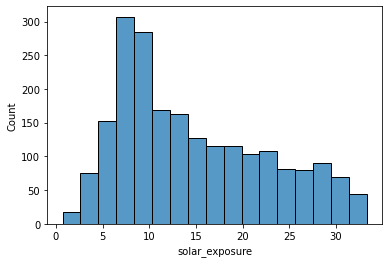

In [9]:
# [Mai]
# df['solar_exposure'].astype('float64').dtype
df['solar_exposure'].dtypes
import seaborn as sns

sns.histplot(df['solar_exposure'])

## LabelEncoder
Change Object data to float

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.loc[:,['school_day','holiday']] # df1 = DataFrame subset of df
df1['school_day'] = le.fit_transform(df['school_day'])
df1['holiday'] = le.fit_transform(df['holiday'])
df1['school_day'].value_counts()


1    1453
0     653
Name: school_day, dtype: int64

In [11]:
df['school_day'].value_counts()

Y    1453
N     653
Name: school_day, dtype: int64

In [12]:
df1['holiday'].value_counts()

0    2029
1      77
Name: holiday, dtype: int64

In [13]:
df['holiday'].value_counts()

N    2029
Y      77
Name: holiday, dtype: int64

In [14]:
print(df1['holiday'])

0       1
1       0
2       0
3       0
4       0
       ..
2101    0
2102    0
2103    0
2104    0
2105    0
Name: holiday, Length: 2106, dtype: int64


All value Yes = 1, No = 0

## Data visualize and exploration

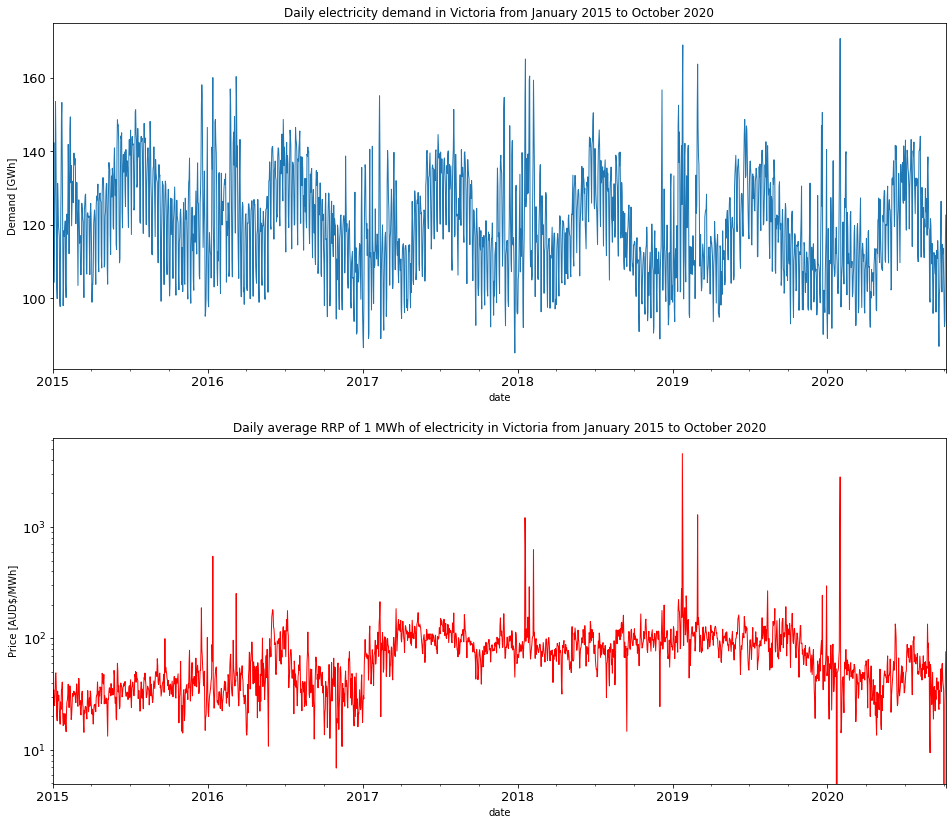

In [15]:
fig, ax = plt.subplots(2, 1, figsize = (16, 14))
ax[0].tick_params(axis='both', which='major', labelsize=13)
ax[1].tick_params(axis='both', which='major', labelsize=13)

df['demand'] = df['demand'] / 1000
df.plot(x='date', y='demand', lw = 1, ax = ax[0])
df['demand'] = df['demand'] * 1000 # Gigawatt hours (GWh = 1 billion watts/hr)
ax[0].set_title("Daily electricity demand in Victoria from January 2015 to October 2020")
ax[0].set_ylabel("Demand [GWh]") 
ax[0].get_legend().remove()

df.plot(x='date', y='price', lw = 1, color='red', ax = ax[1])
ax[1].set_title("Daily average RRP of 1 MWh of electricity in Victoria from January 2015 to October 2020")
ax[1].set_ylabel("Price [AUD$/MWh]")
ax[1].get_legend().remove()
plt.yscale("log") 


## 💪 Competition challenge
1.  How do energy prices change throughout the year? Are there any patterns by season or month of the year?


## Energy price change pattern analysis
> The energy price change has no specific pattern but from the graph we can imply that every January, there was a significantly high recommended retain price. 

> However, the demand of the energy change in pattern. The pattern also show high demand on January, which can describe the lack of supply for them and cause high retain price at that time. On the other hand, at mid year, the demand slightly increases but the retain price has no obvious change.

## Visualizing more data

Dependent variables 
- ['min_temperature', 'max_temperature']  : Lower temperature generates more electricity 
- ['solar_exposure'] : More solar exposure generates more electricity
- ['rainfall'] : Rainfall washes out dust then they will generates more electricity

Other
- ['school_day', 'holiday'] : More electricity usage at the residencies on holiday

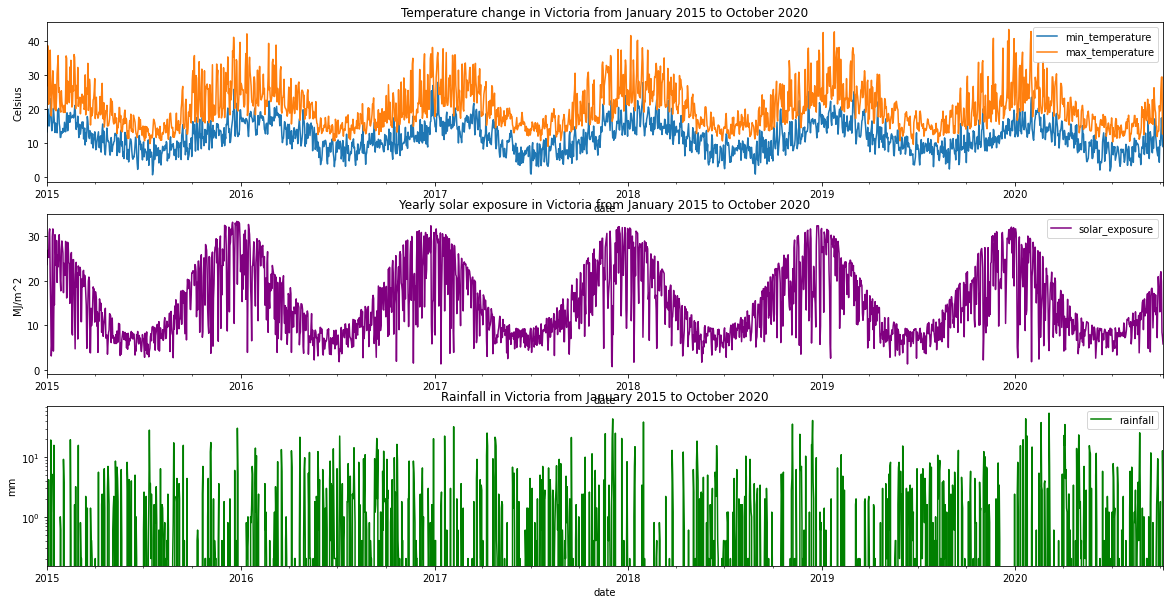

In [16]:
# To plot data by using pandas' dataframe
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(20, 10))
df.plot(x='date', y=['min_temperature', 'max_temperature'], ax=axs[0])
axs[0].set_title('Temperature change in Victoria from January 2015 to October 2020')
axs[0].set_ylabel("Celsius") 

df.plot(x='date', y='solar_exposure', ax=axs[1], color='purple')
axs[1].set_title('Yearly solar exposure in Victoria from January 2015 to October 2020')
axs[1].set_ylabel('MJ/m^2') 

df.plot(x='date', y='rainfall', ax=axs[2], color='green')
axs[2].set_title('Rainfall in Victoria from January 2015 to October 2020')
axs[2].set_ylabel('mm') 
plt.yscale("log") 

plt.show()

### Temperature vs Solar exposure
Both reflect in the same ways

### Temperature/Solar exposure vs price
Lower temperature generates more electricity => at mid year have lower temperature, may be not as high price as in January, which has higher temperature

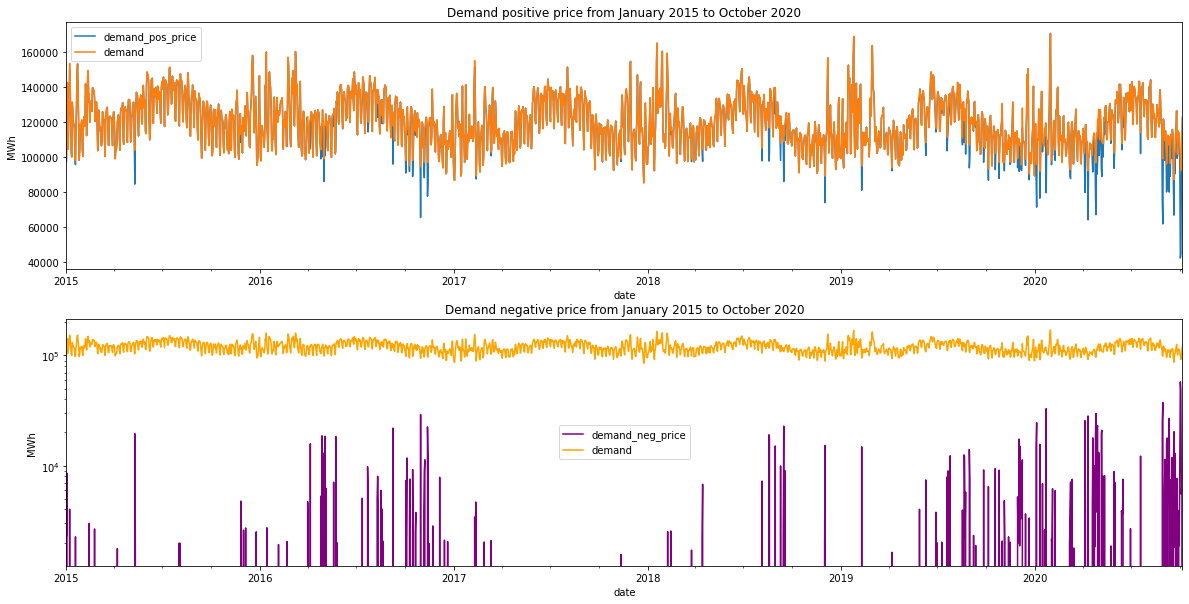

In [17]:
# To plot data by using pandas' dataframe
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(20, 10))
df.plot(x='date', y=['demand_pos_price', 'demand'], ax=axs[0])
axs[0].set_title('Demand positive price from January 2015 to October 2020')
axs[0].set_ylabel("MWh") 

df.plot(x='date', y=['demand_neg_price', 'demand'], ax=axs[1], color=['purple','orange'])
axs[1].set_title('Demand negative price from January 2015 to October 2020')
axs[1].set_ylabel('MWh') 
plt.yscale("log") 

plt.show()

In [18]:
df['price'].where(df['holiday'] == 'Y').plot

In [19]:
df.head()

,date,demand,price,demand_pos_price,price_positive,demand_neg_price,price_negative,frac_at_neg_price,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [20]:
len(df['demand'])

2106

In [21]:
df.corr()

,demand,price,demand_pos_price,price_positive,demand_neg_price,price_negative,frac_at_neg_price,min_temperature,max_temperature,solar_exposure,rainfall
demand,1.000000,0.217538,0.971377,0.215038,-0.180638,0.057854,-0.189839,-0.156118,-0.073216,-0.257546,-0.064662
price,0.217538,1.000000,0.220856,0.999821,-0.078815,0.038931,-0.077955,0.070619,0.165484,0.061818,-0.028615
demand_pos_price,0.971377,0.220856,1.000000,0.214628,-0.409102,0.120054,-0.416573,-0.147020,-0.068146,-0.229878,-0.069770
price_positive,0.215038,0.999821,0.214628,1.000000,-0.062631,0.029455,-0.061968,0.071052,0.165663,0.061320,-0.027832
demand_neg_price,-0.180638,-0.078815,-0.409102,-0.062631,1.000000,-0.274847,0.995590,0.009030,0.000914,-0.037517,0.040491
price_negative,0.057854,0.038931,0.120054,0.029455,-0.274847,1.000000,-0.258065,-0.077248,-0.033255,0.001687,-0.020861
frac_at_neg_price,-0.189839,-0.077955,-0.416573,-0.061968,0.995590,-0.258065,1.000000,0.008859,-0.001174,-0.036749,0.038629
min_temperature,-0.156118,0.070619,-0.147020,0.071052,0.009030,-0.077248,0.008859,1.000000,0.705433,0.376379,-0.002938
max_temperature,-0.073216,0.165484,-0.068146,0.165663,0.000914,-0.033255,-0.001174,0.705433,1.000000,0.599035,-0.154980
solar_exposure,-0.257546,0.061818,-0.229878,0.061320,-0.037517,0.001687,-0.036749,0.376379,0.599035,1.000000,-0.123198


In [22]:
# Correlation of columns to target variable 
correlations = df.corr(method='pearson')
print(correlations['price'].sort_values(ascending=False).to_string())

price                1.000000
price_positive       0.999821
demand_pos_price     0.220856
demand               0.217538
max_temperature      0.165484
min_temperature      0.070619
solar_exposure       0.061818
price_negative       0.038931
rainfall            -0.028615
frac_at_neg_price   -0.077955
demand_neg_price    -0.078815


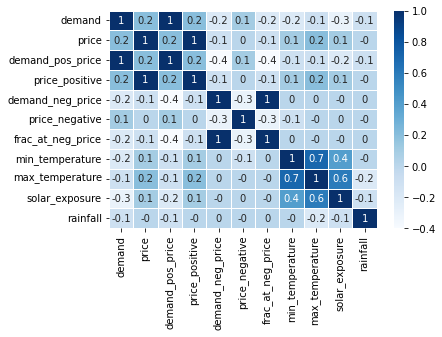

In [23]:
# Assign Variable to drop columns -> no zero value

# Drop Columns with zero values
# heat_map_features = df.drop(columns=zero_val_cols,axis=1)

# Set Figure Size
# plt.figure(figsize=(15,12.5))

# .corr heatmap of df to visualize correlation & show plot
sns.heatmap(round(df.corr(),1),annot=True,cmap='Blues',linewidth=0.9)
plt.show();

In [24]:
# Figure Size
# plt.figure(figsize=(15,10))

# Hist graph to show distribution of target variable
# sns.histplot(df,x='price');

In [25]:
#SEASONAL DECOMPOSE

#from statsmodels.tsa.seasonal import seasonal_decompose

#plt.rcParams["figure.figsize"] = (16, 16)

#T = 365 # days in a year
#decompose = seasonal_decompose(x=df['demand'], period=T, model='additive')
#decompose.plot()
#None

## Data Exploration Findings 
Not normal distrubution of target variable.
Low percentage of nan values in columns without 100% nan.
Found very high correlation between some columns.: solar, tempreature
All data seems to be numeric.

## 💪 Competition challenge
2.  Build a forecast of daily energy prices the company can use as the basis of its financial planning.

> ### Predicting demand

In [26]:
def d2i(timed):
    ''' function input datedelta64 return int'''
    string = str(timed) # change type Timedelta to str
    lst = string.split(' ') # เเยก string ยาวๆ ด้วย ' '
    lst_int = int(lst[0])
    return lst_int

In [27]:
start_date = df['date'].min()
temp = df.loc[:,'date']-start_date
df['days'] = temp.apply(lambda x: d2i(x)) # lambda(input: output)
df['days']

0          0
1          1
2          2
3          3
4          4
        ... 
2101    2101
2102    2102
2103    2103
2104    2104
2105    2105
Name: days, Length: 2106, dtype: int64

In [28]:
start_date = df['date'].min() # วันเเรก แก้แล้ว start จากวันแรกของ overall data


def create_features(df, label=None):
    temp = df.loc[:,'date']-start_date
    df['days'] = temp.apply(lambda x: d2i(x))
    df['demand_7_days_lag'] = df['demand'].shift(7) 
    df['demand_15_days_lag'] = df['demand'].shift(15)
    df['demand_30_days_lag'] = df['demand'].shift(30)
    df['demand_7_days_mean'] = df['demand'].rolling(window = 7).mean()
    df['demand_15_days_mean'] = df['demand'].rolling(window = 15).mean()
    df['demand_30_days_mean'] = df['demand'].rolling(window = 30).mean()
    df['demand_7_days_std'] = df['demand'].rolling(window = 7).std()
    df['demand_15_days_std'] = df['demand'].rolling(window = 15).std()
    df['demand_30_days_std'] = df['demand'].rolling(window = 30).std()
    df['demand_7_days_max'] = df['demand'].rolling(window = 7).max()
    df['demand_15_days_max'] = df['demand'].rolling(window = 15).max()
    df['demand_30_days_max'] = df['demand'].rolling(window = 30).max()
    df['demand_7_days_min'] = df['demand'].rolling(window = 7).min()
    df['demand_15_days_min'] = df['demand'].rolling(window = 15).min()
    df['demand_30_days_min'] = df['demand'].rolling(window = 30).min()
    
    cols = ['days']
    
    for d in ('7', '15', '30'):
        for c in ('lag', 'mean', 'std', 'max', 'min'):
            cols.append(f'demand_{d}_days_{c}')
    
    X = df[cols]
    if label:
        y = df[label]
        return X, y
    return X

In [29]:
# At the latest year '2020' starting from Jan #1826
print(df['date'][1500]) 
split_date = df['days'][1826]  
split_date

# split_date = '01-Jan-2020' -----> Run ไม่ได้? 

2019-02-09 00:00:00


1826

In [30]:
df_train = df.loc[df['days'] <= split_date].copy()
df_test = df.loc[df['days'] > split_date].copy()

In [31]:
print(df_test)

           date      demand      price  demand_pos_price  price_positive  \
1827 2020-01-02  102988.185  69.546226        102988.185       69.546226   
1828 2020-01-03  118922.215  65.435922        118922.215       65.435922   
1829 2020-01-04  102245.610  28.042231         87566.775       43.312297   
1830 2020-01-05   95671.200  18.875436         71162.635       30.412319   
1831 2020-01-06  110253.590  56.104400        110253.590       56.104400   
...         ...         ...        ...               ...             ...   
2101 2020-10-02   99585.835  -6.076028         41988.240       26.980251   
2102 2020-10-03   92277.025  -1.983471         44133.510       32.438156   
2103 2020-10-04   94081.565  25.008614         88580.995       26.571687   
2104 2020-10-05  113610.030  36.764701        106587.375       39.616015   
2105 2020-10-06  122607.560  75.771059        122607.560       75.771059   

      demand_neg_price  price_negative  frac_at_neg_price  min_temperature  \
1827     

In [32]:
X_train, y_train = create_features(df_train, label='demand')
X_test, y_test = create_features(df_test, label='demand')

In [33]:
X_test.dtypes

days                     int64
demand_7_days_lag      float64
demand_7_days_mean     float64
demand_7_days_std      float64
demand_7_days_max      float64
demand_7_days_min      float64
demand_15_days_lag     float64
demand_15_days_mean    float64
demand_15_days_std     float64
demand_15_days_max     float64
demand_15_days_min     float64
demand_30_days_lag     float64
demand_30_days_mean    float64
demand_30_days_std     float64
demand_30_days_max     float64
demand_30_days_min     float64
dtype: object

In [34]:
!pip install xgboost

In [35]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) 

[0]	validation_0-rmse:85248.16748	validation_1-rmse:82600.57670
[1]	validation_0-rmse:60144.46418	validation_1-rmse:57828.72737
[2]	validation_0-rmse:42679.77160	validation_1-rmse:40976.87681
[3]	validation_0-rmse:30604.55339	validation_1-rmse:31671.00093
[4]	validation_0-rmse:22237.45059	validation_1-rmse:24918.12376
[5]	validation_0-rmse:16549.27270	validation_1-rmse:19747.17881
[6]	validation_0-rmse:12709.65523	validation_1-rmse:16796.19127
[7]	validation_0-rmse:10271.26437	validation_1-rmse:14604.75012
[8]	validation_0-rmse:8670.02185	validation_1-rmse:13219.95273
[9]	validation_0-rmse:7641.86042	validation_1-rmse:12505.71388
[10]	validation_0-rmse:6960.41817	validation_1-rmse:11830.85755
[11]	validation_0-rmse:6612.12490	validation_1-rmse:11628.88776
[12]	validation_0-rmse:6268.17798	validation_1-rmse:11447.55157
[13]	validation_0-rmse:5862.96119	validation_1-rmse:11357.56470
[14]	validation_0-rmse:5735.33132	validation_1-rmse:11380.04299
[15]	validation_0-rmse:5399.01475	validati

/Users/pawinee/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:3616.23990	validation_1-rmse:10967.70537
[33]	validation_0-rmse:3565.40482	validation_1-rmse:10932.66477
[34]	validation_0-rmse:3471.67467	validation_1-rmse:10980.05171
[35]	validation_0-rmse:3429.24258	validation_1-rmse:10987.91360
[36]	validation_0-rmse:3402.77503	validation_1-rmse:11036.20022
[37]	validation_0-rmse:3377.62716	validation_1-rmse:11053.57282
[38]	validation_0-rmse:3330.51903	validation_1-rmse:11080.89918
[39]	validation_0-rmse:3318.09370	validation_1-rmse:11085.70874
[40]	validation_0-rmse:3251.38457	validation_1-rmse:11122.51561
[41]	validation_0-rmse:3172.90493	validation_1-rmse:11143.82031
[42]	validation_0-rmse:3143.61835	validation_1-rmse:11157.18206
[43]	validation_0-rmse:3120.91532	validation_1-rmse:11156.71740
[44]	validation_0-rmse:3040.90116	validation_1-rmse:11109.09048
[45]	validation_0-rmse:3031.46805	validation_1-rmse:11110.61029
[46]	validation_0-rmse:2946.32754	validation_1-rmse:11097.95848
[47]	validation_0-rmse:2903.56604	valida

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

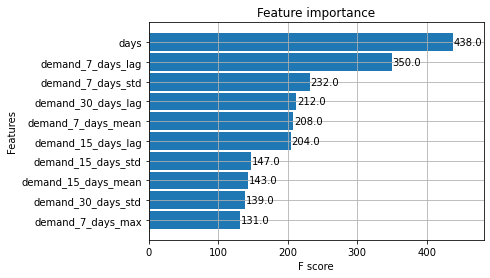

In [36]:
_ = plot_importance(reg, height=0.9 ,max_num_features = 10)

In [37]:
df_test['predict'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

In [38]:
#_ = df_all[['demand','predict']].plot(figsize=(15, 5))

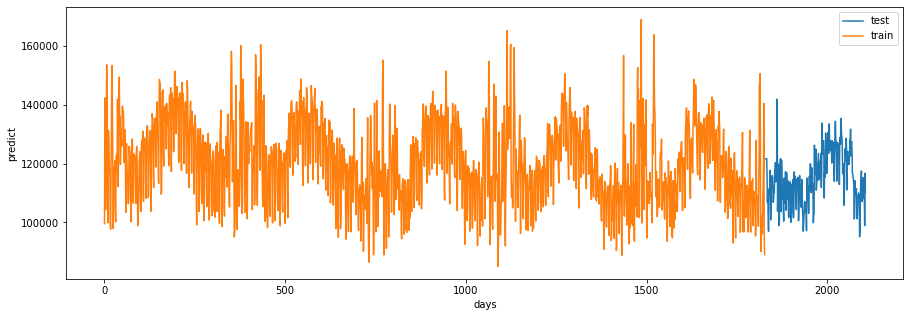

In [39]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_test, x ='days',y='predict',label='test')
sns.lineplot(data=df_train,x='days',y='demand',label='train')
plt.show()

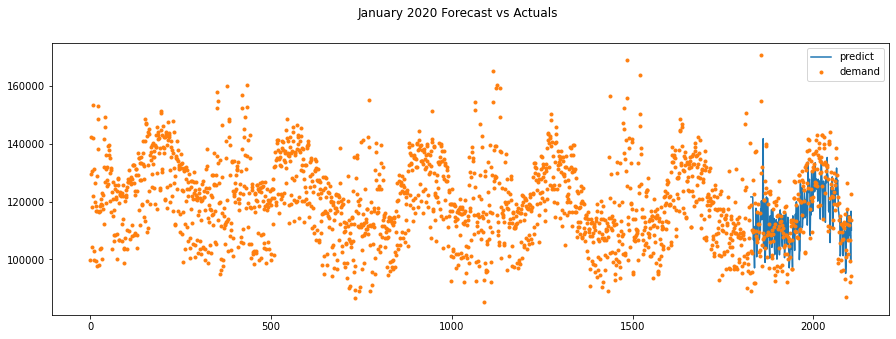

In [40]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['predict','demand']].plot(ax=ax, style=['-','.'])
plot = plt.suptitle('January 2020 Forecast vs Actuals')

In [41]:
mean_squared_error(y_true=df_test['demand'],
                   y_pred=df_test['predict'])

118611852.21581908

### Predicting price

## Adding Holidays data

In [42]:
df2 = df.loc[:,['days','demand', 'price', 'solar_exposure', 'min_temperature','max_temperature']] + df1.loc[:,['school_day','holiday']]

In [43]:
start_date = df['date'].min() # วันเเรก


def create_features(df2, label=None):
    temp = df.loc[:,'date']-start_date
    df2['days'] = temp.apply(lambda x: d2i(x))
    df2['price'] = df['price']
    df2['solar_exposure'] = df['solar_exposure']
    df2['min_temperature'] = df['min_temperature']
    df2['max_temperature'] = df['max_temperature']
    df2['demand'] = df['demand']
    df2['price_7_days_lag'] = df['price'].shift(7) 
    df2['price_15_days_lag'] = df['price'].shift(15)
    df2['price_30_days_lag'] = df['price'].shift(30)
    df2['price_7_days_mean'] = df['price'].rolling(window = 7).mean()
    df2['price_15_days_mean'] = df['price'].rolling(window = 15).mean()
    df2['price_30_days_mean'] = df['price'].rolling(window = 30).mean()
    df2['price_7_days_std'] = df['price'].rolling(window = 7).std()
    df2['price_15_days_std'] = df['price'].rolling(window = 15).std()
    df2['price_30_days_std'] = df['price'].rolling(window = 30).std()
    df2['price_7_days_max'] = df['price'].rolling(window = 7).max()
    df2['price_15_days_max'] = df['price'].rolling(window = 15).max()
    df2['price_30_days_max'] = df['price'].rolling(window = 30).max()
    df2['price_7_days_min'] = df['price'].rolling(window = 7).min()
    df2['price_15_days_min'] = df['price'].rolling(window = 15).min()
    df2['price_30_days_min'] = df['price'].rolling(window = 30).min()
    df2['holiday'] = df1['holiday']
    df2['school_day'] = df1['school_day']
    


    cols2 = ['days','price', 'solar_exposure', 'min_temperature','max_temperature', 'demand','holiday', 'school_day']
    
        
    for d in ('7', '15', '30'):
        for c in ('lag', 'mean', 'std', 'max', 'min'):
            cols2.append(f'price_{d}_days_{c}')
     

    X2 = df2[cols2]
    if label:
        y2 = df2[label]
        return X2, y2
    return X2

In [44]:
split_date = df['days'][1500]  
split_date


1500

In [45]:
df2_train = df2.loc[df.index <= split_date].copy()
df2_test = df2.loc[df.index > split_date].copy()

In [46]:
df2_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 1501 to 2105
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   days             0 non-null      float64
 1   demand           0 non-null      float64
 2   holiday          0 non-null      float64
 3   max_temperature  0 non-null      float64
 4   min_temperature  0 non-null      float64
 5   price            0 non-null      float64
 6   school_day       0 non-null      float64
 7   solar_exposure   0 non-null      float64
dtypes: float64(8)
memory usage: 42.5 KB


In [47]:
df2_test.dtypes

days               float64
demand             float64
holiday            float64
max_temperature    float64
min_temperature    float64
price              float64
school_day         float64
solar_exposure     float64
dtype: object

In [48]:
X2_train, y2_train = create_features(df2_train, label='price')
X2_test, y2_test = create_features(df2_test, label='price')

In [49]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

reg = xgb.XGBRegressor(n_estimators=200) ###### หาวิธี predict วันที่ต้องการ เช่น reg.predict ----> หาค่า x มาใส่
reg.fit(X2_train, y2_train,
        eval_set=[(X2_train, y2_train), (X2_test, y2_test)],
        early_stopping_rounds=50,
       verbose=True) 

[0]	validation_0-rmse:120.03499	validation_1-rmse:112.68849
[1]	validation_0-rmse:98.27820	validation_1-rmse:81.14440
[2]	validation_0-rmse:81.25363	validation_1-rmse:61.36432
[3]	validation_0-rmse:67.69584	validation_1-rmse:54.42678
[4]	validation_0-rmse:56.74364	validation_1-rmse:58.00179
[5]	validation_0-rmse:47.76800	validation_1-rmse:66.53669
[6]	validation_0-rmse:40.32759	validation_1-rmse:76.57407
[7]	validation_0-rmse:34.11774	validation_1-rmse:86.33731
[8]	validation_0-rmse:28.90919	validation_1-rmse:95.25669
[9]	validation_0-rmse:24.51907	validation_1-rmse:103.11167
[10]	validation_0-rmse:20.81130	validation_1-rmse:109.96087
[11]	validation_0-rmse:17.67437	validation_1-rmse:115.87998
[12]	validation_0-rmse:15.01715	validation_1-rmse:120.96914
[13]	validation_0-rmse:12.76492	validation_1-rmse:125.33292
[14]	validation_0-rmse:10.85380	validation_1-rmse:129.06599
[15]	validation_0-rmse:9.18282	validation_1-rmse:130.00917
[16]	validation_0-rmse:7.81302	validation_1-rmse:132.72872

/Users/pawinee/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-rmse:0.58832	validation_1-rmse:147.84918
[39]	validation_0-rmse:0.57407	validation_1-rmse:147.91529
[40]	validation_0-rmse:0.55772	validation_1-rmse:147.97121
[41]	validation_0-rmse:0.54058	validation_1-rmse:148.01892
[42]	validation_0-rmse:0.52587	validation_1-rmse:148.03138
[43]	validation_0-rmse:0.51419	validation_1-rmse:148.04123
[44]	validation_0-rmse:0.50485	validation_1-rmse:148.07032
[45]	validation_0-rmse:0.49148	validation_1-rmse:148.09516
[46]	validation_0-rmse:0.48071	validation_1-rmse:148.10119
[47]	validation_0-rmse:0.46599	validation_1-rmse:148.11927
[48]	validation_0-rmse:0.46288	validation_1-rmse:148.12383
[49]	validation_0-rmse:0.45857	validation_1-rmse:148.12738
[50]	validation_0-rmse:0.44797	validation_1-rmse:148.12791
[51]	validation_0-rmse:0.44081	validation_1-rmse:148.13072
[52]	validation_0-rmse:0.43341	validation_1-rmse:148.13298
[53]	validation_0-rmse:0.42259	validation_1-rmse:148.13462


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

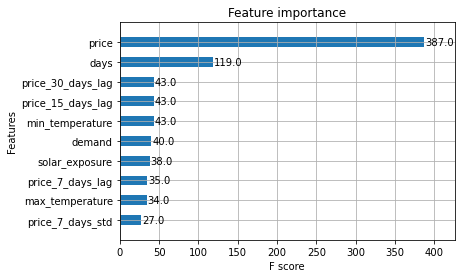

In [50]:
_ = plot_importance(reg, height=0.5 ,max_num_features = 10)

In [51]:
df2_test['predict'] = reg.predict(X2_test)
df2_all = pd.concat([df2_test, df2_train], sort=False)

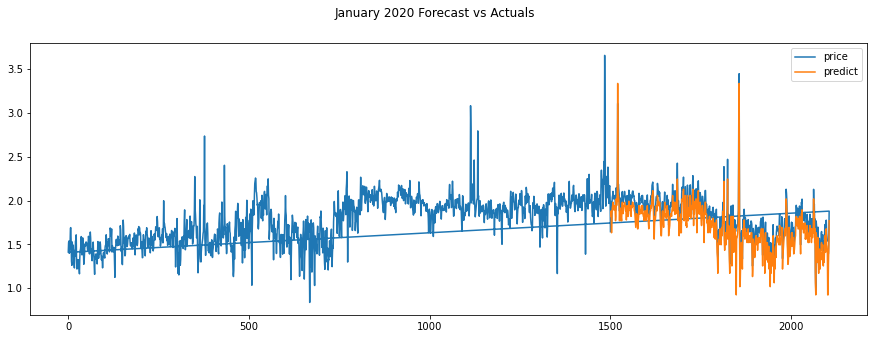

In [52]:
import numpy as np
_ = np.log10(df2_all[['price','predict']]).plot(figsize=(15, 5)) #changed to log scale
plot = plt.suptitle('January 2020 Forecast vs Actuals')


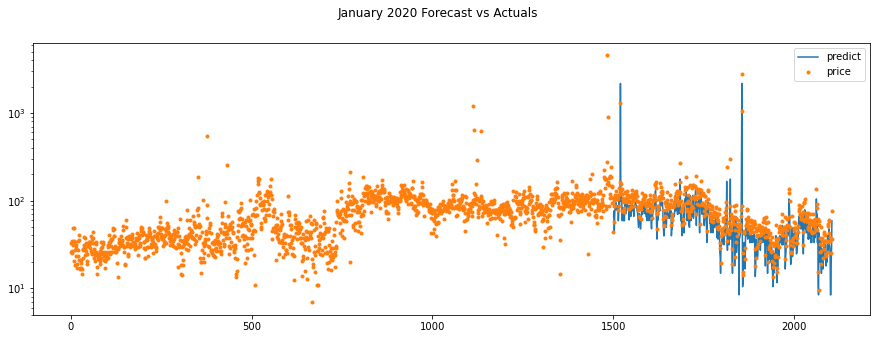

In [53]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df2_all[['predict','price']].plot(ax=ax, style=['-','.'])
plot = plt.suptitle('January 2020 Forecast vs Actuals')
plt.yscale("log") 



/Users/pawinee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/pawinee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


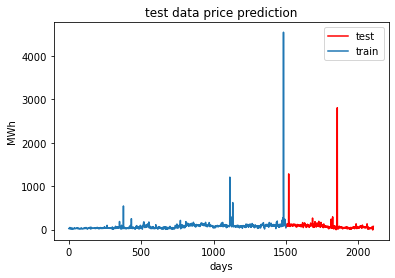

In [54]:
# plot train vs test df2
sns.lineplot(df2_test['days'], df2_test['price'], label='test', color='red')
sns.lineplot(df2_train['days'], df2_train['price'], label='train')
plt.title('test data price prediction')
plt.ylabel("MWh") 

plt.show()

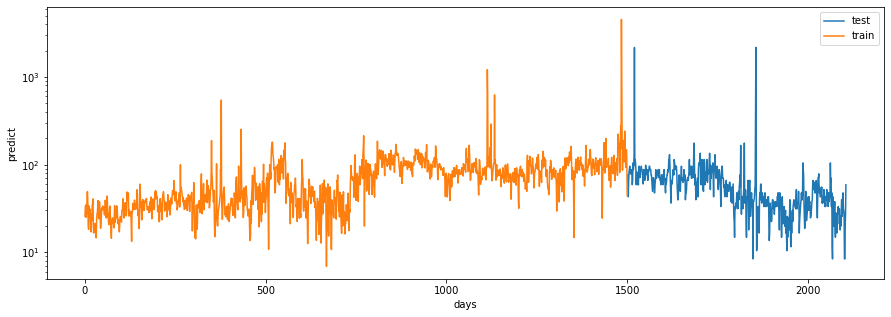

In [55]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df2_test, x ='days',y='predict',label='test')
sns.lineplot(data=df2_train,x='days',y='price',label='train')
plt.yscale("log") 
plt.show()

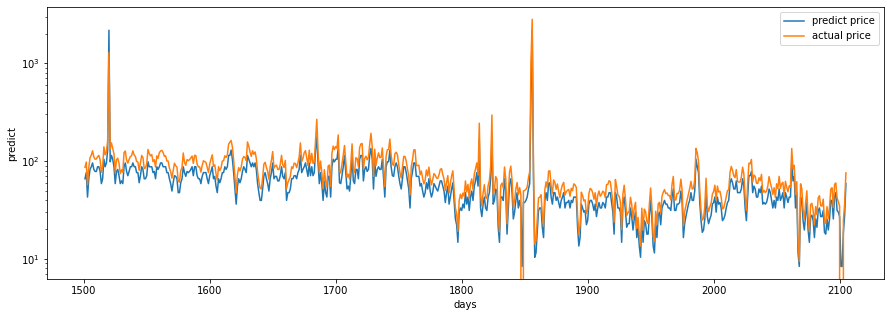

In [56]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df2_test, x ='days',y='predict',label='predict price')
sns.lineplot(data=df2_test,x='days',y='price',label='actual price')
plt.yscale("log") 
plt.show()


In [57]:
mean_squared_error(y_true=df2_test['price'],
                   y_pred=df2_test['predict'])

2962.2750069995172

In [58]:
from sklearn.metrics import r2_score
r2_score(df2_test['price'], df2_test['predict'])

0.8319170860919441

# !! HOW TO PREDICT FUTURE????

In [59]:
# pip install pystan==2.19.1.1 prophet

In [60]:
!pip install pystan==2.19.1.1 prophet
from prophet import fbprophet

Importing plotly failed. Interactive plots will not work.


ImportError: cannot import name 'fbprophet' from 'prophet' (/Users/pawinee/opt/anaconda3/lib/python3.9/site-packages/prophet/__init__.py)

## 💪 Competition challenge
3. Provide guidance on how much revenue the energy storage venture could generate per year using retail prices and a 70MWh storage system.
จุไฟได้ 70MWh ต่อ battery

TO DO LIST
> CALCULATE ENERGY PRODUCTION BY 'solar_exposure' x 70MWh -> Max storage \
> 'holiday' and 'school_day' price difference calculation '2106-holiday-school'\ 
> calculate per year 

In [ ]:
df1.head()

In [ ]:
df.head()

In [ ]:
df['holiday'] = df1['holiday']
df['school_day'] = df1['school_day']

# Revenue = 70MWh/hr x 24 hr x price per MWh
df['revenue'] = df[['price']] *70*24
df.head()

In [ ]:
df.head()

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
df.plot(x='date', y=['revenue', 'price'], ax=axs[0])
axs[0].set_title('Temperature change in Victoria from January 2015 to October 2020')
axs[0].set_ylabel("AUD") 

df.plot(x='date', y='revenue', ax=axs[1], color='purple')
axs[1].set_title('revenue per day')
axs[1].set_ylabel('AUD') 
plt.yscale("log") 


plt.show()

In [ ]:
df3 = df.loc[:,['days','demand', 'price', 'solar_exposure', 'min_temperature','max_temperature','school_day','holiday','revenue']]

In [ ]:
df3.head()

In [ ]:
def create_features(df3, label=None):
    df3['days'] = temp.apply(lambda x: d2i(x))
    df3['solar_exposure'] = df['solar_exposure']
    df3['min_temperature'] = df['min_temperature']
    df3['max_temperature'] = df['max_temperature']
    df3['revenue_7_days_lag'] = df3['revenue'].shift(7) 
    df3['revenue_15_days_lag'] = df3['revenue'].shift(15)
    df3['revenue_30_days_lag'] = df3['revenue'].shift(30)
    df3['revenue_7_days_mean'] = df3['revenue'].rolling(window = 7).mean()
    df3['revenue_15_days_mean'] = df3['revenue'].rolling(window = 15).mean()
    df3['revenue_30_days_mean'] = df3['revenue'].rolling(window = 30).mean()
    df3['revenue_7_days_std'] = df3['revenue'].rolling(window = 7).std()
    df3['revenue_15_days_std'] = df3['revenue'].rolling(window = 15).std()
    df3['revenue_30_days_std'] = df3['revenue'].rolling(window = 30).std()
    df3['revenue_7_days_max'] = df3['revenue'].rolling(window = 7).max()
    df3['revenue_15_days_max'] = df3['revenue'].rolling(window = 15).max()
    df3['revenue_30_days_max'] = df3['revenue'].rolling(window = 30).max()
    df3['revenue_7_days_min'] = df3['revenue'].rolling(window = 7).min()
    df3['revenue_15_days_min'] = df3['revenue'].rolling(window = 15).min()
    df3['revenue_30_days_min'] = df3['revenue'].rolling(window = 30).min()
    df3['holiday'] = df3['holiday']
    df3['school_day'] = df3['school_day']
    
    cols3 = ['days','price', 'solar_exposure', 'min_temperature','max_temperature', 'demand','holiday', 'school_day', 'revenue']

    
    for d in ('7', '15', '30'):
        for c in ('lag', 'mean', 'std', 'max', 'min'):
            cols3.append(f'revenue_{d}_days_{c}')
    
    X = df3[cols3]
    if label:
        y = df3[label]
        return X, y
    return X

In [ ]:
df3_train = df3.loc[df3.index <= split_date].copy()
df3_test = df3.loc[df3.index > split_date].copy()

In [ ]:
print(df3_train.shape)

In [ ]:
print(df3_test.shape)

In [ ]:
df3_test.dtypes

In [ ]:
df3.info

In [ ]:
# plot train vs test df3
sns.lineplot(df3_test['days'], df3_test['revenue'], label='test', color='red')
sns.lineplot(df3_train['days'], df3_train['revenue'], label='train')
plt.title('test data demand prediction')
plt.ylabel("MWh") 

plt.show()

In [ ]:
X_train, y_train = create_features(df3_train, label='revenue')
X_test, y_test = create_features(df3_test, label='revenue')

In [ ]:
reg = xgb.XGBRegressor(n_estimators=200)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) 

In [ ]:
_ = plot_importance(reg, height=0.5 ,max_num_features = 10)

In [ ]:
df3_test['predict'] = reg.predict(X_test)
df3_all = pd.concat([df3_test, df3_train], sort=False)

In [ ]:
_ = np.log10(df3_all[['revenue','predict']]).plot(figsize=(20, 10)) #change to log scale
plot = plt.suptitle('January 2020 Forecast vs Actuals')

## Prophet pack

In [ ]:
!pip install pystan==2.19.1.1 prophet


In [ ]:
from prophet import Prophet